In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [4]:
def soft_blending(clean, filmed, ones_t2c, mask):
    zw1 = tf.math.subtract(ones_t2c, mask)
    zw1 = tf.math.multiply(zw1, clean)

    zw2 = tf.multiply(mask, filmed)
    return tf.math.add(zw1, zw2)

width, heigh = 10, 10
ones = tf.ones((width, width))
zeros = tf.zeros((width, width))
ones_t2c = tf.complex(ones, zeros)

filmed = tf.multiply(ones_t2c, 5)
clean = tf.multiply(ones_t2c, 10)

mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 0.5)

result = soft_blending(clean, filmed, ones_t2c, mask)
mask



<tf.Tensor: shape=(10, 10), dtype=complex64, numpy=
array([[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j,
        0.5+0.j, 0.5+

In [155]:
np.random.seed = 42
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3


In [156]:
TRAIN_FILMED_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\model_at_tree_5_pics\\filmed"
TRAIN_CLEAN_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\model_at_tree_5_pics\\clean_aligned"


In [157]:
train_filmed_imgs = []
train_clean_imgs = []


In [158]:
OFFSET = 400

for addr_filmed in os.listdir(TRAIN_FILMED_PATH):
    img = cv2.imread(f"{TRAIN_FILMED_PATH}\{addr_filmed}", cv2.IMREAD_GRAYSCALE)
    train_filmed_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])

for addr_clean in os.listdir(TRAIN_CLEAN_PATH):
    img = cv2.imread(f"{TRAIN_CLEAN_PATH}\{addr_clean}", cv2.IMREAD_GRAYSCALE)
    train_clean_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])


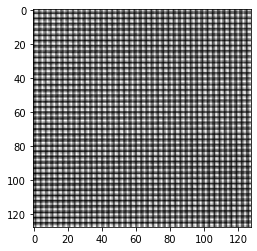

In [159]:
img_filmed = train_filmed_imgs[0]
img_clean = train_clean_imgs[0]
plt.imshow(img_filmed, cmap="gray")
plt.show()


In [160]:
#  img = img[:, :, 0]

In [161]:
def f2pd(fourier_array):
    # transoforms an fourier image into pixel domain in order
    # to display it
    return (np.log(abs(fourier_array)))

[[-278.          +0.j         -202.01052597-248.31731917j
  -377.73066577+142.5787144j  ... -162.5763438 +332.87652692j
  -377.73066577-142.5787144j  -202.01052597+248.31731917j]
 [ 138.13620228 +41.93707032j  -88.89373446+140.5461387j
  -226.48072387+247.86011986j ...  -38.65511063 +28.05057955j
    74.37328755 -23.96190663j -252.07884803-116.44749296j]
 [ -60.90115992+114.11122246j -335.63064073-186.43340246j
   -81.13906433+339.41767234j ...  -84.0328143 +180.94845478j
  -104.5462421 -545.88816284j -134.5469965 +328.70964428j]
 ...
 [  91.40106539-458.66294266j -208.07082931 -75.34102944j
   230.71950781-154.34583237j ...  564.05252844 -37.15446497j
   562.24263048-469.81910344j  111.62692802-120.96773141j]
 [ -60.90115992-114.11122246j -134.5469965 -328.70964428j
  -104.5462421 +545.88816284j ...  237.69117795 -98.72523209j
   -81.13906433-339.41767234j -335.63064073+186.43340246j]
 [ 138.13620228 -41.93707032j -252.07884803+116.44749296j
    74.37328755 +23.96190663j ...   31.1214

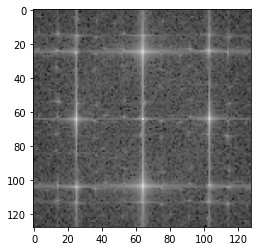

In [162]:
img_filmed = np.fft.fftshift(np.fft.fft2(img_filmed))
img_clean = np.fft.fftshift(np.fft.fft2(img_clean))
print(img_filmed)
plt.imshow(f2pd(img_filmed), cmap="gray")


In [174]:

input_1 = keras.Input(shape=(1), batch_size=1)
input_2 = keras.Input(shape=(1), batch_size=1)
input_3 = keras.Input(shape=(1), batch_size=1)

output_1 = input_1 + input_2 + input_3


model_1 = keras.Model(inputs=[input_1, input_2, input_3], outputs=[output_1])

execute_model_1 = tf.function(model_1)

execute_model_1([1,2,3])




<tf.Tensor: shape=(), dtype=float32, numpy=6.0>